In [1]:
#KARP std 0.04, APARA std 0.047
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import spotter_15_4_S as spotter
from astropy.io import ascii

In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /software/rhel7/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

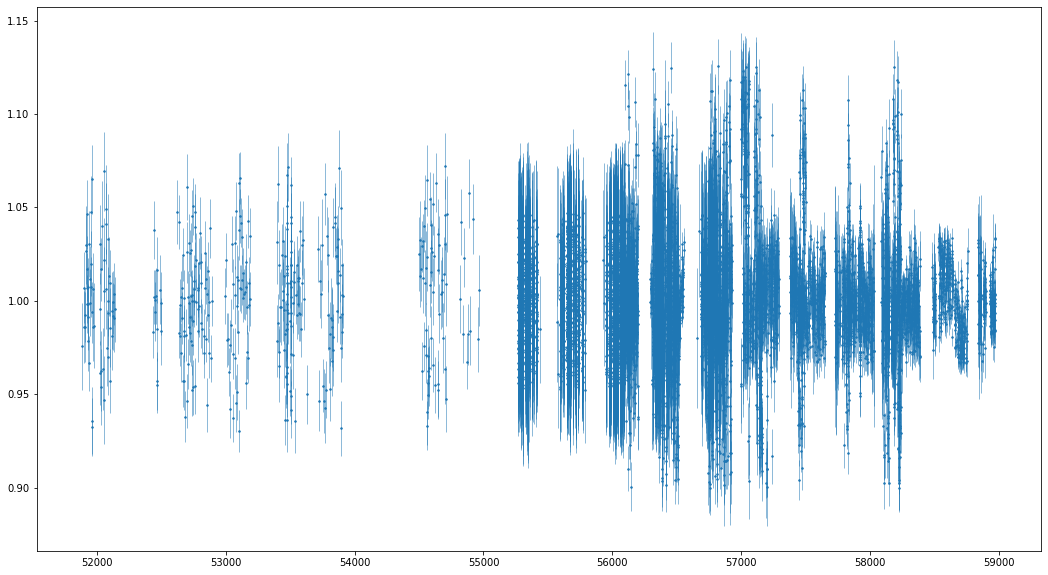

9843


In [4]:
data = ascii.read('Final_KARPA_Data_BRO2.csv')
err_mask = (data['col3'] < 0.05) #Removing measurements with high uncertainty
data = data[err_mask]
plt.errorbar(data['col1'], data['col2'], yerr = data['col3'], fmt='.', markersize= 3, elinewidth=0.5)
figure = plt.gcf()
figure.set_size_inches(18, 10)
plt.show()

print(len(data))

In [5]:
#Enter data in which to spot transit, or enter fakely generated data over a certain time interval
time = data['col1']
flux = data['col2']#spotter.fake_data_generator(time, spotter.noise_generator(time, 'Gauss', np.std(data['col2'])))#flux = data['col2']
e_flux = data['col3']
transit_params = [2.0, 2.65, 10.0, 0.95*1.989*10**30, 0.96*6.96*10**8, 90, 0, 90]

print(np.std(flux))
#removing the unlikely data
#flux_mask =  (flux < np.median(flux)+2*np.std(flux))#*(flux > np.median(flux)-2*np.std(flux))
#time = time[flux_mask]
#flux = flux[flux_mask]
#e_flux = e_flux[flux_mask]

print(np.std(flux))

#----------------------------------------------------------------------------------------------------------------------
print(len(time))


0.02790289068141584
0.02790289068141584
9843


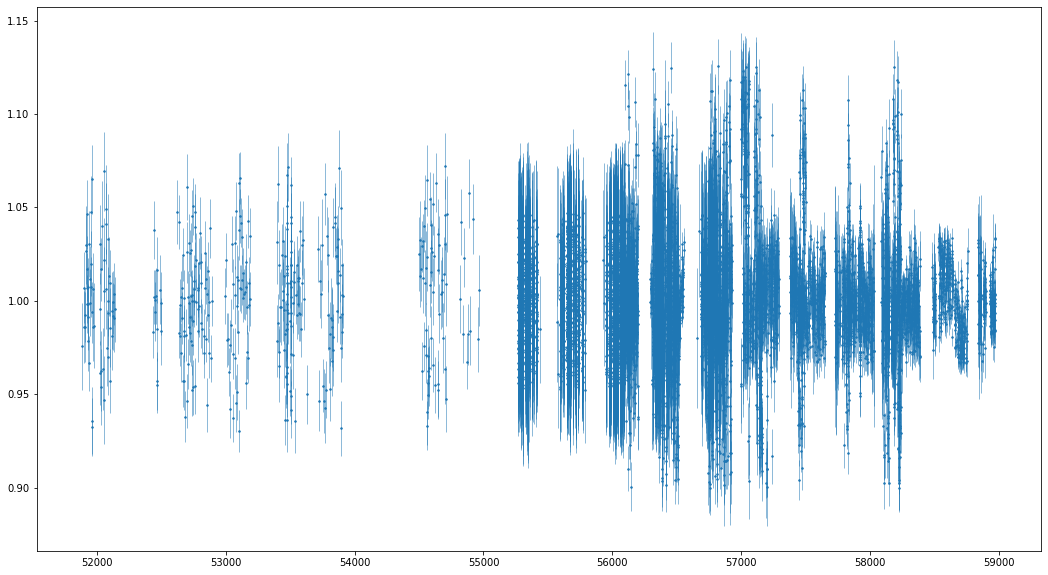

In [6]:
plt.errorbar(time, flux, yerr = e_flux, fmt='.', markersize= 3, elinewidth=0.5)
figure = plt.gcf()
figure.set_size_inches(18, 10)
plt.show()

Transit Least Squares TLS 1.0.24 (21 November 2019)


/home/barmentloo/.local/lib/python3.6/site-packages/transitleastsquares/transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  lc_arr = numpy.array(lc_arr)
  0%|          | 0/11540 periods | 00:00<?

Creating model cache for 36 durations
Searching 9843 data points, 11540 periods from 3.0 to 39.999 days
Using 36 of 96 CPU threads


100%|██████████| 11540/11540 periods | 02:26<00:00
/software/rhel7/lib64/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/software/rhel7/lib64/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/software/rhel7/lib64/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/barmentloo/.local/lib/python3.6/site-packages/transitleastsquares/main.py:404: UserWarning: 880 of 882 transits without data. The true period may be twice the given period.
  warnings.warn(text)


Period 8.02565 d
Transit depth 0.98626
Best duration (days) 0.00343
Signal detection efficiency (SDE): 9.086428611267644
[8.025650930249851, 5.997184162576796, 29.094096086442626] [9.086428611267644, 6.398910766307577, 6.341147613091707]


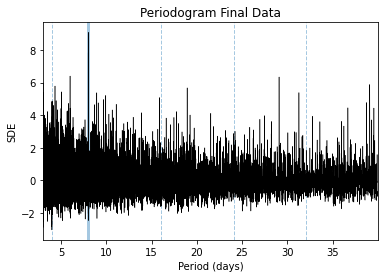

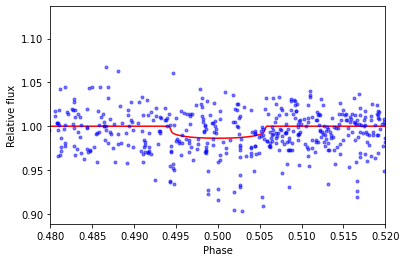

In [7]:
##### main input: times, transit_flux, yerr, min_p, max_p, plot, stats, add_transit, transit_params
#transit_params input: depth, t_inferior_conjunction, orbital period, stellar mass, stellar radius, inclination, eccentricity, longitude of periastron 
results = spotter.main(time, flux, e_flux, 3, 40, True, True, False, transit_params, 'tls') 

In [8]:
maskie = results[2].model_folded_model < 1.0
print((results[2].model_folded_phase[maskie][-1]-results[2].model_folded_phase[maskie][0])*results[0][0])

0.09377665687652231


In [19]:
print(results[2].period)
print(np.max(results[2].power))
print(np.min(results[2].model_folded_model))

8.025650930249851
9.086428611267644
0.9862618549684166


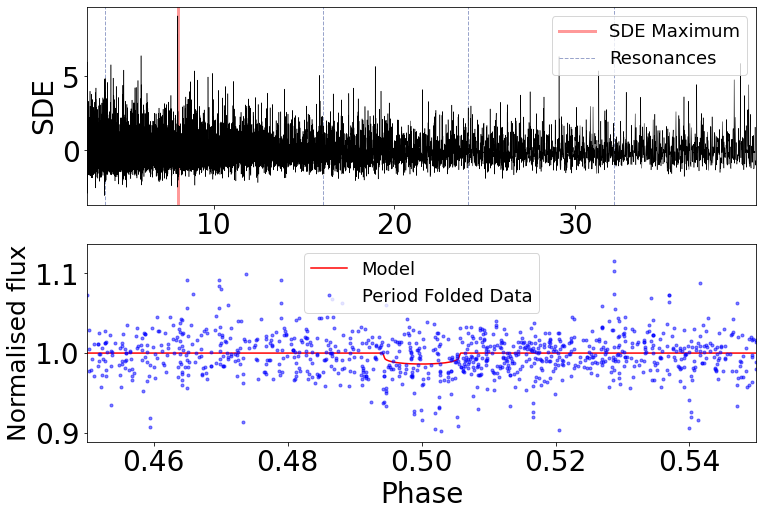

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib
plt.style.use('seaborn-dark-palette')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2, 1)

plt.figure()
axs[0].axvline(results[2].period, alpha=0.4, lw=3, label='SDE Maximum', color='red')
for n in range(2, 10):
    axs[0].axvline(n*results[2].period, alpha=0.4, lw=1, linestyle="dashed")
    axs[0].axvline(results[2].period / n, alpha=0.4, lw=1, linestyle="dashed")
    if n == 9:
        axs[0].axvline(n*results[2].period, alpha=0.4, lw=1, linestyle="dashed", label='Resonances')
    
axs[0].set_ylabel(r'SDE')
axs[0].set_xlabel('Orbital Period (days)')
axs[0].plot(results[2].periods, results[2].power, color='black', lw=0.5)
axs[0].set_xlim(np.min(results[2].periods), np.max(results[2].periods))
axs[0].legend(loc = 'upper right', fontsize=18)
            
#might want to remove the below here with our own folding alogrithm
axs[1].plot(results[2].model_folded_phase, results[2].model_folded_model, color='red', label ='Model')
axs[1].errorbar(results[2].folded_phase, results[2].folded_y, fmt='.', color='blue', alpha=0.5, zorder=2, label='Period Folded Data') #Might error here
axs[1].set_xlim(0.45, 0.55)
#axs[1].set_ylim(0.7, 1.3)
axs[1].set_xlabel('Phase')
axs[1].set_ylabel('Normalised flux', fontsize = 25)
axs[1].legend(fontsize=18)

fig.set_size_inches(12, 8)

fig.savefig('Ground_Based_search.pdf')            
plt.show()

In [15]:
def bin_lightcurve(time, flux, eflux, transit_period):
    #Using M=0.95M_sun, R=0.96R_sun
    time = time%transit_period
    time, flux = zip(*sorted(zip(time, flux)))
    a = (((((transit_period*86400)**2)*(6.6743*10**-11)*(1.8895*10**30))/(4*np.pi**2))**(1./3.))/(667872*10**3)
    transit_duration = transit_period/(np.pi*a)
    print('Transit duration:', str(transit_duration)[:5], 'days')
    bin_length = 0.2*transit_duration
    n_bins = int(transit_period/bin_length)
    print('Number of bins: ', n_bins)
    times = np.arange(0, n_bins)
    means, means_err = [], []
    for i in range(n_bins):
        time_i = [abs(time-(time[0]+i*bin_length)).argmin(), abs(time-(time[0]+(i+1)*bin_length)).argmin()]
        mean = np.average(flux[time_i[0]:time_i[1]+1])
        eflux_squared = []
        for j in range(time_i[0], time_i[1]+1):
            eflux_squared.append(eflux[j]**2)
        mean_err = np.sqrt(np.sum(eflux_squared))/(time_i[1]+1-time_i[0])
        means.append(mean)
        means_err.append(mean_err)
    times = times*0.2*transit_duration
    return times, np.array(means)/np.mean(means), np.array(means_err)/np.mean(means)

Transit duration: 0.147 days
Number of bins:  271


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


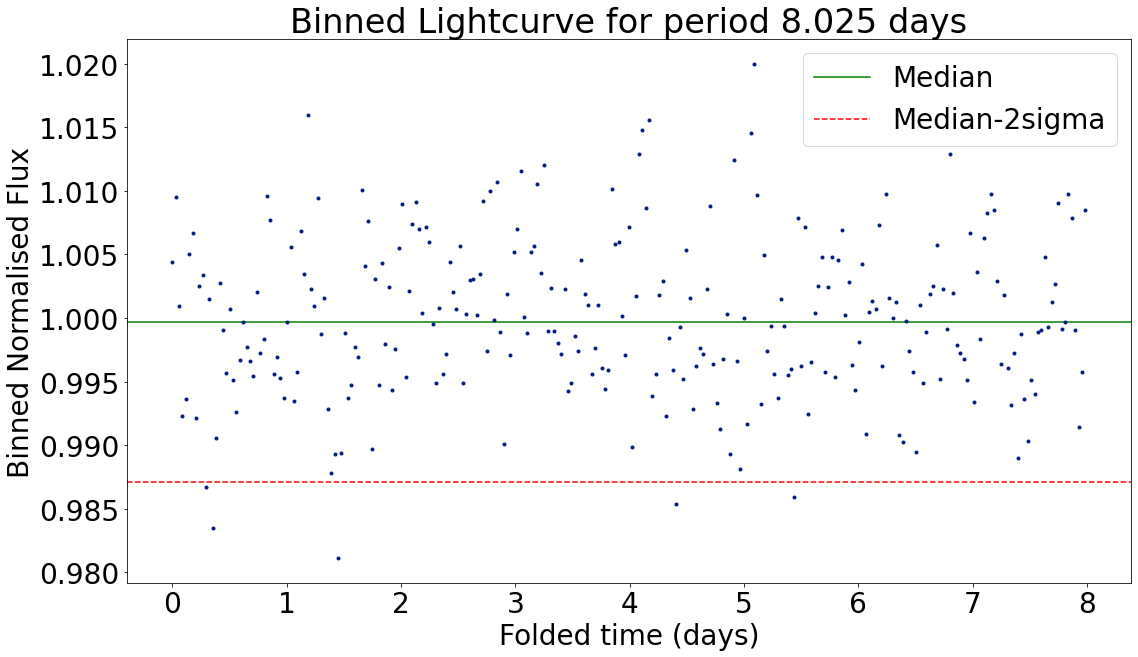

In [16]:
#interesting periods: 
#3.017 (KARP+APARA+KARA)
#13.098 (KAR)
maskie = (flux > 0.05)*(flux < 1.95)
times_b, flux_b, eflux_b = bin_lightcurve(time[maskie], flux[maskie], e_flux[maskie], results[0][0])
plt.errorbar(times_b, flux_b, fmt='.')
plt.axhline(y=np.median(flux_b), c='g', label='Median')
plt.axhline(y=np.median(flux_b)-2*np.std(flux_b), linestyle= '--', c='r', label='Median-2sigma')
figure = plt.gcf()
figure.set_size_inches(18, 10)
plt.legend()
plt.xlabel('Folded time (days)')
plt.ylabel('Binned Normalised Flux')
plt.title('Binned Lightcurve for period '+str(results[0][0])[:5]+ ' days')
#plt.savefig('Binned_Period_2.png')
plt.show()
#print(results[0])
#standard fake data: spotter.fake_data_generator(time, spotter.noise_generator(time, 'Gauss', np.std(hmb_data['Flux'])))